In [94]:
import matplotlib.pyplot as plt

def plot_over_epochs(y_values: list, title: str, y_label: str, legend: str):
    plt.figure(figsize=(4, 4))
    plt.plot(list(range(len(y_values))), y_values, label=legend)
    plt.title(title)
    plt.xlabel('epochs')
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

In [95]:
from neural_network import NeuralNetwork
from math_functions.loss import LossFunction
from math_functions.activation import ActivationFunction
from monks import read_monk

train_data, train_target = read_monk('datasets/monks/monks-1.train')
test_data, test_target = read_monk('datasets/monks/monks-1.test')

In [96]:
nn_monk1 = NeuralNetwork(n_hidden_layers=1, hidden_layer_sizes=[3], n_output_units=1, training_loss_type_value=LossFunction.MSE.value, validation_loss_type_value=LossFunction.MEE.value, activation_hidden_type_value=ActivationFunction.SIGMOID.value, activation_output_type_value=ActivationFunction.SIGMOID.value, learning_rate=0.1, epochs=200, batch_size=1, classification=True, verbose=False).train_net(train_data, train_target, test_data, test_target)

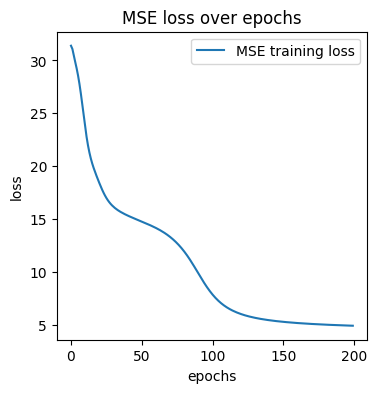

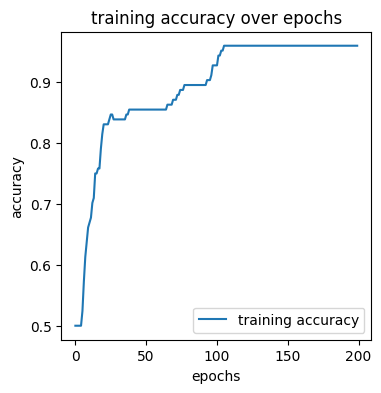

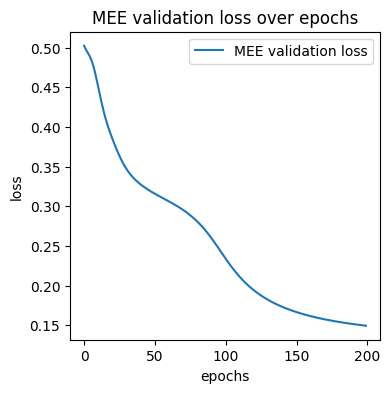

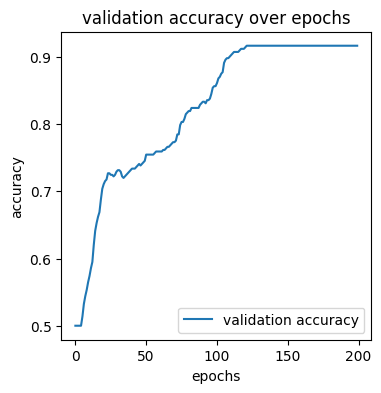

In [97]:
plot_over_epochs(y_values=nn_monk1.training_losses, title='MSE loss over epochs', y_label='loss', legend='MSE training loss')
plot_over_epochs(y_values=nn_monk1.training_accuracy, title='training accuracy over epochs', y_label='accuracy', legend='training accuracy')
plot_over_epochs(y_values=nn_monk1.validation_losses, title='MEE validation loss over epochs', y_label='loss', legend='MEE test loss')
plot_over_epochs(y_values=nn_monk1.validation_accuracy, title='validation accuracy over epochs', y_label='accuracy', legend='test accuracy')

In [98]:
train_data, train_target = read_monk('datasets/monks/monks-2.train')
test_data, test_target = read_monk('datasets/monks/monks-2.test')

In [99]:
nn_monk2 = NeuralNetwork(n_hidden_layers=1, hidden_layer_sizes=[3], n_output_units=1, training_loss_type_value=LossFunction.MSE.value, validation_loss_type_value=LossFunction.MEE.value, activation_hidden_type_value=ActivationFunction.SIGMOID.value, activation_output_type_value=ActivationFunction.SIGMOID.value, learning_rate=0.1, epochs=200, batch_size=1, classification=True, verbose=False).train_net(train_data, train_target, test_data, test_target)

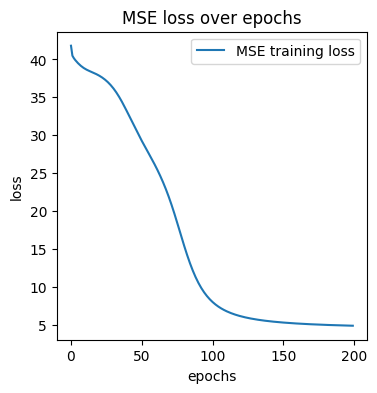

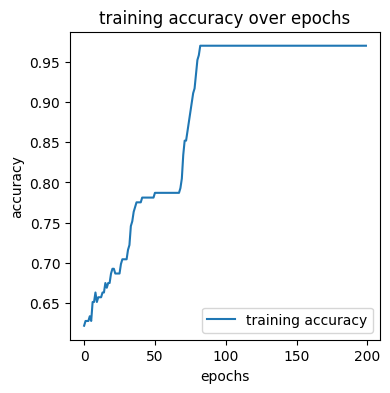

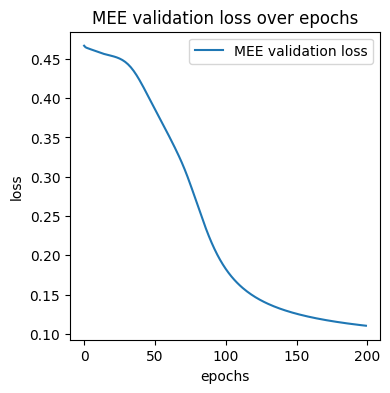

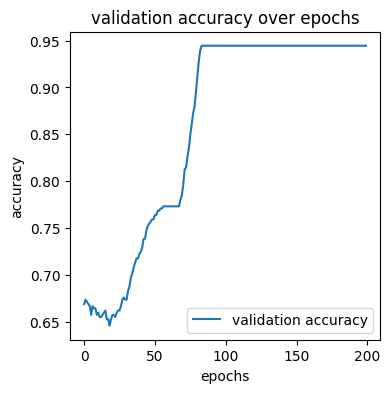

In [100]:
plot_over_epochs(y_values=nn_monk2.training_losses, title='MSE loss over epochs', y_label='loss', legend='MSE training loss')
plot_over_epochs(y_values=nn_monk2.training_accuracy, title='training accuracy over epochs', y_label='accuracy', legend='training accuracy')
plot_over_epochs(y_values=nn_monk2.validation_losses, title='MEE validation loss over epochs', y_label='loss', legend='MEE test loss')
plot_over_epochs(y_values=nn_monk2.validation_accuracy, title='validation accuracy over epochs', y_label='accuracy', legend='test accuracy')

In [101]:
train_data, train_target = read_monk('datasets/monks/monks-3.train')
test_data, test_target = read_monk('datasets/monks/monks-3.test')

In [102]:
nn_monk3 = NeuralNetwork(n_hidden_layers=1, hidden_layer_sizes=[3], n_output_units=1, training_loss_type_value=LossFunction.MSE.value, validation_loss_type_value=LossFunction.MEE.value, activation_hidden_type_value=ActivationFunction.SIGMOID.value, activation_output_type_value=ActivationFunction.SIGMOID.value, learning_rate=0.1, epochs=200, batch_size=1, classification=True, verbose=False).train_net(train_data, train_target, test_data, test_target)

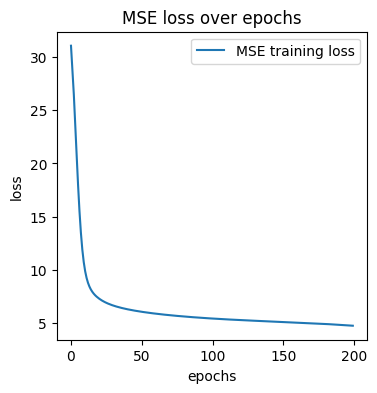

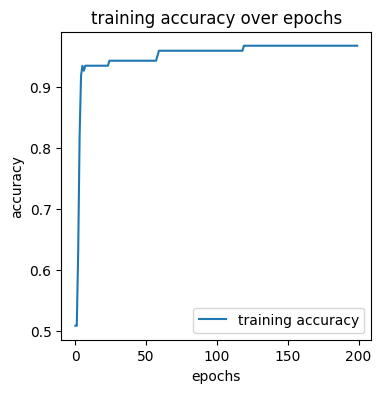

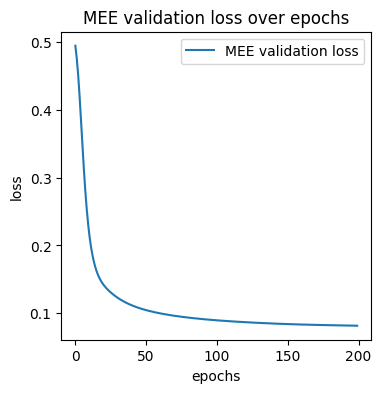

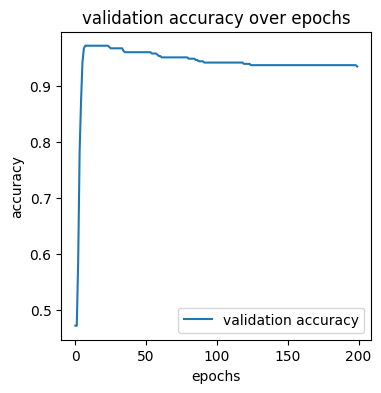

In [103]:
plot_over_epochs(y_values=nn_monk3.training_losses, title='MSE loss over epochs', y_label='loss', legend='MSE training loss')
plot_over_epochs(y_values=nn_monk3.training_accuracy, title='training accuracy over epochs', y_label='accuracy', legend='training accuracy')
plot_over_epochs(y_values=nn_monk3.validation_losses, title='MEE validation loss over epochs', y_label='loss', legend='MEE test loss')
plot_over_epochs(y_values=nn_monk3.validation_accuracy, title='validation accuracy over epochs', y_label='accuracy', legend='test accuracy')